### Importación de bibliotecas necesarias, carga de archivo y cálculo de Retornos Simples, Retornos Logarítmicos y estadísticos descriptivos.

- Importar las bibliotecas:

    - pandas
    - numpy
    - matplotlib
    - scipy
    - statsmodels (Realizar QQplots)

- **Para correr en colab, agregar el archivo `SP500_.xlsx`**

# Modelado Estocástico

## Clase 1 - S&P500

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

- Lectura del archivo de datos y creación de un nuevo dataframe con los datos que contiene.

Pandas permite leer archivos de diferentes formatos y convertirlos en dataframes. En este caso se trata de un archivo de extensión `.xlsx` y se utiliza `read_excel`(_nombre de archivo_) de pandas para cargar los datos de su primera pestaña.

In [ ]:
df = pd.read_excel('SP500_.xlsx', sheet_name=0)
df.head()

,Date,Close
0,2020-06-19,3097.739990
1,2020-06-22,3117.860107
2,2020-06-23,3131.290039
3,2020-06-24,3050.330078
4,2020-06-25,3083.760010


- Se mantienen en el dataframe las columnas relevantes, `Date` y `Close`, y se quitan los `NaNs`.
- Se convierten los valores de la columna `Date` para que sean objetos datetime de pandas y se ordena el dataframe por fecha.

In [ ]:
df = df[['Date','Close']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

- Se calculan los valores correspondientes a los [Retornos Simples](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html#pandas.DataFrame.pct_change) en la columna `Return_pct`  y los Retornos Logarítmicos. en la columna `Return_log`.

[`shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) permite tomar los valores de la columna `Close` desplazados.

Recordemos:

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$

$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$

In [ ]:
df['Return_pct'] = df['Close'].pct_change()
df['Return_log'] = np.log(df['Close'] / df['Close'].shift(1))

- Estadísticos descriptivos.

In [ ]:
df['Return_pct'].describe()

,Return_pct
count,1255.000000
mean,0.000585
std,0.011039
min,-0.059750
25%,-0.004965
50%,0.000888
75%,0.006860
max,0.095154


In [ ]:
df.head(10)

,Date,Close,Return_pct,Return_log
0,2020-06-19,3097.739990,NaN,NaN
1,2020-06-22,3117.860107,0.006495,0.006474
2,2020-06-23,3131.290039,0.004307,0.004298
3,2020-06-24,3050.330078,-0.025855,-0.026195
4,2020-06-25,3083.760010,0.010959,0.010900
5,2020-06-26,3009.050049,-0.024227,-0.024525
6,2020-06-29,3053.239990,0.014686,0.014579
7,2020-06-30,3100.290039,0.015410,0.015292
8,2020-07-01,3115.860107,0.005022,0.005010
9,2020-07-02,3130.010010,0.004541,0.004531


### Gráficos

**Serie de tiempo del índice**

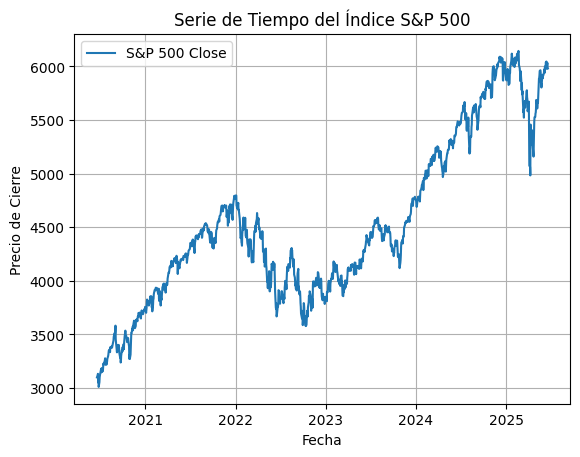

In [ ]:
plt.figure()
plt.plot(df['Date'], df['Close'], label='S&P 500 Close')
plt.title('Serie de Tiempo del Índice S&P 500')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.show()

**Serie de tiempo de los Retornos Simples**

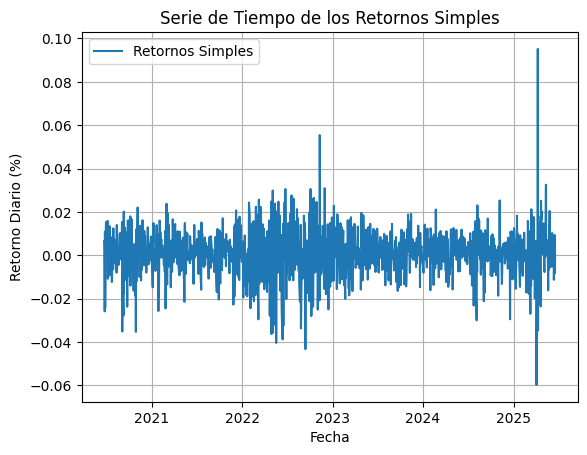

In [ ]:
plt.figure()
plt.plot(df['Date'], df['Return_pct'], label='Retornos Simples')
plt.title('Serie de Tiempo de los Retornos Simples')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario (%)')
plt.grid(True)
plt.legend()
plt.show()

**QQ Plot de los Retornos Simples Estandarizados**

Utilizando la columna correspondiente a los Retornos Simples (sin `NaNs`) se calculan los Retornos Estandarizados y se realiza el QQ Plot correspondiente.

$z_t = \frac{R_t - \mu}{\sigma}$

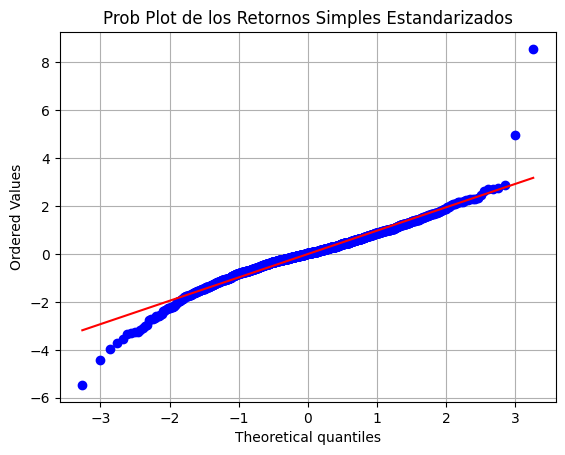

In [ ]:
retornos = df['Return_pct'].dropna()
retornos_estandarizados = (retornos - retornos.mean()) / retornos.std()

plt.figure()
stats.probplot(retornos_estandarizados, dist="norm", plot=plt)
plt.title('Prob Plot de los Retornos Simples Estandarizados')
plt.grid(True)
plt.show()

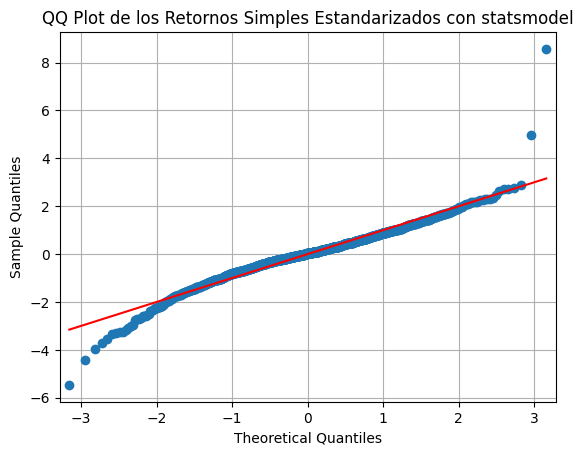

In [ ]:
sm.qqplot(retornos_estandarizados, line='s', fit=True)
#line='s' fx identidad or line=45 grados
plt.title('QQ Plot de los Retornos Simples Estandarizados con statsmodel')
plt.grid(True)
plt.show()

### Test de Jarque-Bera

$JB = \frac{n}{6} \left( S^2 + \frac{K^2_E}{4} \right)$

In [ ]:
asimetria =  (((retornos- retornos.mean())/retornos.std())**3).mean()
curtosis  =  (((retornos- retornos.mean())/retornos.std())**4).mean()
n_retornos = retornos.size
JB = n_retornos/6 * (asimetria**2 + 0.25* (curtosis - 3)**2)

kurtosis = stats.kurtosis(retornos,fisher=False) #fisher = True (por defecto) es la excess kurtosis
skewness = stats.skew(retornos)

jb_stat, jb_pvalue = stats.jarque_bera(retornos)

print(f'P-valor: {jb_pvalue:.4f}')
print(f'Estadístico de Jarque-Bera: {jb_stat:.4f}')
print(f'asimetría calculada: {asimetria:.4f}')
print(f'asimetría de stats: {skewness:.4f}')
print(f'curtosis calculada: {curtosis:.4f}')
print(f'curtosis de stats: {kurtosis:.4f}')
print(f'JB: {JB:.4f}')


P-valor: 0.0000
Estadístico de Jarque-Bera: 1964.0195
asimetría calculada: 0.0610
asimetría de stats: 0.0611
curtosis calculada: 9.1128
curtosis de stats: 9.1273
JB: 1954.7114
